# Data analysis: bitweight emulator 

In [1]:
from matplotlib import pyplot as plt
from astropy.io import (fits, ascii)
import numpy as np
from matplotlib import ticker, cm, colors
from matplotlib.ticker import LinearLocator

## Reading and analysing FOF-code output 

In [2]:
namin_part = '/global/cfs/cdirs/desi/survey/catalogs/main/mocks/FAemu_preliminary/fof_v1.0/out/forFAemu_m0_rad0.045_part_llen0.02.dat'
namin_halo = '/global/cfs/cdirs/desi/survey/catalogs/main/mocks/FAemu_preliminary/fof_v1.0/out/forFAemu_m0_rad0.045_halos_llen0.02.dat'

In [3]:
print("namin_part =", namin_part)
data = ascii.read(namin_part, format='no_header')
#x, y, z = np.array(data["col1"]), np.array(data["col2"]), np.array(data["col3"])
x, z, y = np.array(data["col1"]), np.array(data["col2"]), np.array(data["col3"])
h = np.array(data["col4"])

#print(x)
#print(y)
#print(z)
#print(h)

namin_part = /global/cfs/cdirs/desi/survey/catalogs/main/mocks/FAemu_preliminary/fof_v1.0/out/forFAemu_m0_rad0.045_part_llen0.02.dat


In [4]:
print("namin_halo =", namin_halo)
data = ascii.read(namin_halo, format='no_header')
#xh, yh, zh = np.array(data["col1"]), np.array(data["col2"]), np.array(data["col3"])
xh, zh, yh = np.array(data["col1"]), np.array(data["col2"]), np.array(data["col3"])
wh = np.array(data["col4"])
halosz = np.array(data["col5"])
hh = np.array(data["col6"])

print('size of the larger halo =', np.max(halosz))
idmax = np.where(halosz == np.max(halosz))[0][0]
print('idmax, hh[idmax] =',idmax, hh[idmax])

#print(xh)
#print(yh)
#print(zh)
#print(wh)
#print(halosz)
#print(hh)

namin_halo = /global/cfs/cdirs/desi/survey/catalogs/main/mocks/FAemu_preliminary/fof_v1.0/out/forFAemu_m0_rad0.045_halos_llen0.02.dat
size of the larger halo = 1014
idmax, hh[idmax] = 15183 15591


first bin  2327041.0
rest of the bins  786797.0
sum of the rest  15809548.155778892


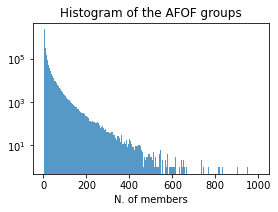

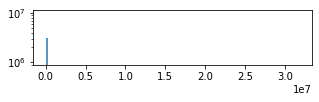

In [5]:
plt.figure(1, figsize=[4,3])
histo = plt.hist(halosz, range=[1,1000], bins=199, density=False, alpha=0.75, log=True);

plt.title("Histogram of the AFOF groups")
plt.xlabel("N. of members")
plt.subplots_adjust(left=0.13, right=0.95, bottom=0.15, top=0.85)

namplt = "plt/hist_AFOF.jpeg"
plt.savefig(namplt, format='jpeg', dpi=1000)
#namplt = "plt/hist_llen0.022.pdf"
#plt.savefig(namplt, format='pdf', dpi=1000)
#print("a file named '"+namplt+"' has been written")

plt.figure(2, figsize=[5,1])
plt.hist(halosz, range=[0,len(x)], bins=100, density=False, alpha=0.75, log=True);

print('first bin ',histo[0][0])
print('rest of the bins ',np.sum(histo[0][1:]))
print('sum of the rest ',np.sum(histo[0][1:] * (histo[1][1:len(histo[0])]) + 0.5*(histo[1][1]-histo[1][0])))

### Visualising the largest halo

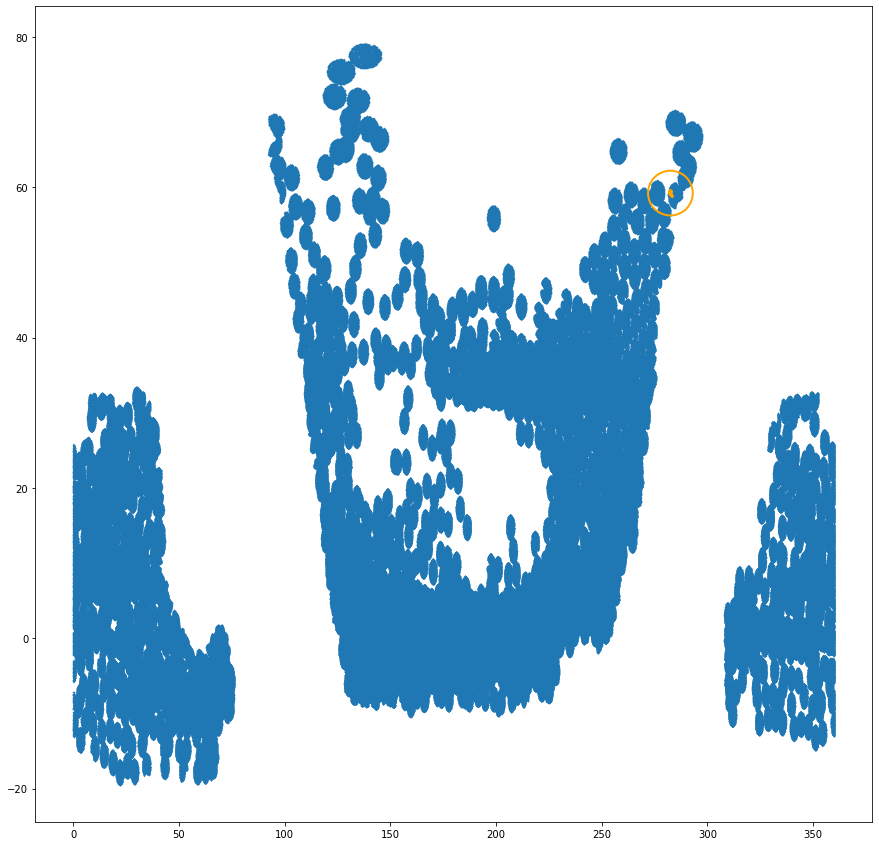

In [6]:
plt.figure(3, figsize=[15,15])
plt.scatter(xh, zh, color='tab:blue', marker='.', s=0.5, label='halos')

xbig = x[np.where(h == hh[idmax])] 
zbig = z[np.where(h == hh[idmax])] 
#print(xbig)

plt.scatter(xbig, zbig, color='orange', marker='.', s=0.5, label='part')
plt.scatter(xh[idmax], zh[idmax], marker='o', s=2000.0, label='part', facecolors='none', edgecolors='orange', linewidth=2)

### Checking log binning
Stand-alone routine, use it before running the bitweight emulator (when learning from fiber assigned mocks) to decide the bin settings for the $\bar{q}(sz,\bar{nt})$ function

In [7]:
nlogbins_sz_t = 24
logbinsz_sz_t = 0.15
zerolog_sz_t = 0.0
nlogbins_ntm_t = 12
logbinsz_ntm_t = 0.14
zerolog_ntm_t = -0.5

for j in range(1, nlogbins_sz_t+1):
    sz_b = 10**(zerolog_sz_t + (j-1)*logbinsz_sz_t)
    sz_b0 = 10**(zerolog_sz_t + (j-1.5)*logbinsz_sz_t)
    sz_b1 = 10**(zerolog_sz_t + (j-0.5)*logbinsz_sz_t)
    print(sz_b, '(', sz_b0, sz_b1, ')')
    
print()

for k in range(1, nlogbins_ntm_t+1):
    ntm_b = 10**(zerolog_ntm_t + (k-1)*logbinsz_ntm_t)
    ntm_b0 = 10**(zerolog_ntm_t + (k-1.5)*logbinsz_ntm_t)
    ntm_b1 = 10**(zerolog_ntm_t + (k-0.5)*logbinsz_ntm_t)
    print(ntm_b, '(', ntm_b0, ntm_b1, ')')

1.0 ( 0.8413951416451951 1.1885022274370185 )
1.4125375446227544 ( 1.1885022274370185 1.6788040181225603 )
1.9952623149688795 ( 1.6788040181225603 2.371373705661655 )
2.8183829312644537 ( 2.371373705661655 3.3496543915782766 )
3.9810717055349722 ( 3.3496543915782766 4.7315125896148045 )
5.623413251903491 ( 4.7315125896148045 6.6834391756861455 )
7.943282347242813 ( 6.6834391756861455 9.440608762859233 )
11.220184543019636 ( 9.440608762859233 13.33521432163324 )
15.848931924611133 ( 13.33521432163324 18.836490894898002 )
22.38721138568339 ( 18.836490894898002 26.6072505979881 )
31.622776601683793 ( 26.6072505979881 37.583740428844415 )
44.6683592150963 ( 37.583740428844415 53.08844442309882 )
63.0957344480193 ( 53.08844442309882 74.98942093324558 )
89.12509381337455 ( 74.98942093324558 105.92537251772886 )
125.89254117941675 ( 105.92537251772886 149.6235656094433 )
177.82794100389228 ( 149.6235656094433 211.34890398366454 )
251.18864315095797 ( 211.34890398366454 298.538261891796 )
354.

## Reading and analysing the bitweigth-emulator output
### Plotting the $\bar{q}(sz,\bar{nt})$ function

In [8]:
namin_qm = '/global/cfs/cdirs/desi/survey/catalogs/main/mocks/FAemu_preliminary/emulate_bitw_v1.0/out/FAemu_m0_rad0.045_llen0.02_qm_log.dat'
nbins_sz = 24

data = ascii.read(namin_qm, format='no_header')
sz = np.reshape(np.array(data["col1"]), (nbins_sz, -1))[:,0]
ntm = np.reshape(np.array(data["col2"]), (nbins_sz, -1))[0,:]
qm = np.reshape(np.array(data["col3"]), (nbins_sz, -1))

In [9]:
range_sz = [0.0, 1100.0]
range_ntm = [0.0, 8.0]
#levels_xi = [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6]
#levels_xi = [-1.0, -0.5, -0.2, -0.1, 0.0, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0]
#levels_qm = np.arange(0.001, 1.0, 0.01)
levels_qm = np.arange(0.0, 1.01, 0.01)
print(levels_qm)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]


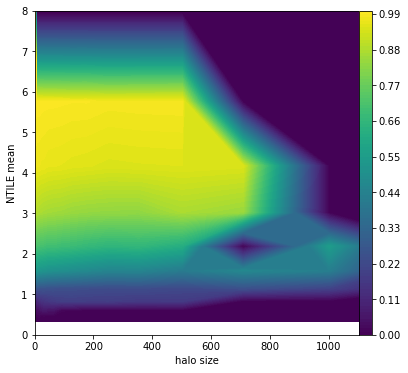

In [10]:
fig = plt.figure(4, figsize=[6,6])
#cs = plt.contourf(rp_0, pi_0, xi_0.T/xi_1.T, levels_xi,norm=colors.LogNorm()) #locator=ticker.LogLocator(), cmap=cm.PuBu_r)
cs = plt.contourf(sz, ntm, qm.T,
                  levels_qm,
                  #norm=colors.LogNorm(),
                  #locator=ticker.LogLocator(),
                  #cmap=cm.PuBu_r
                 )

plt.xlim(range_sz)
plt.ylim(range_ntm)
plt.xlabel(r"halo size")
plt.ylabel(r"NTILE mean")
#plt.title(label[0])

cbaxes = fig.add_axes([0.88, 0.15, 0.03, 0.75])   
plt.colorbar(cs, cax=cbaxes)

plt.subplots_adjust(left=0.13, right=0.88, bottom=0.15, top=0.9)

(11, 21) (11, 21) (21, 11)


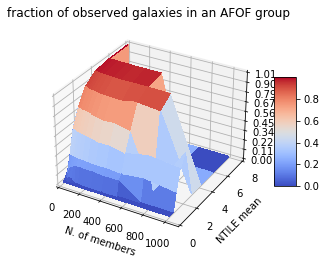

In [11]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

#X, Y = np.meshgrid(sz, ntm)
#Z = qm
#print(np.shape(X), np.shape(X), np.shape(Z))

X, Y = np.meshgrid(sz[np.where(sz<range_sz[1])],
                   ntm[np.where(ntm<range_ntm[1])])

id_cut_sz = np.where(sz < range_sz[1])
id_cut_ntm = np.where(ntm < range_ntm[1])

X, Y = np.meshgrid(sz[id_cut_sz], ntm[id_cut_ntm])

Z = np.array([[0.0 for i in range(0, len(id_cut_ntm[0]))] for j in range(0, len(id_cut_sz[0]))])
#print(np.shape(Z))
for i in range(0, np.shape(id_cut_sz)[1]):
    for j in range(0, np.shape(id_cut_ntm)[1]):
        #print(i,j)
        Z[i,j] = qm[i,j]

print(np.shape(X), np.shape(X), np.shape(Z))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z.T,
                       cmap=cm.coolwarm,
                       linewidth=0,
                       antialiased=False)
#surf = ax.plot_surface(X, Y, (X/400)**0.2,
                       #cmap=cm.coolwarm,
                       #linewidth=0,
                       #antialiased=False)

# Customize the z axis.
ax.set_zlim(0.0, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

ax.set_xlim(range_sz)
ax.set_ylim(range_ntm)
ax.set_xlabel("N. of members")
ax.set_ylabel("NTILE mean")
ax.set_title("fraction of observed galaxies in an AFOF group")

#ax.view_init(elev=50., azim=160.)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

### Defining sigmoid-ish function
Cn be used to in different ways to both fit and extrapolate $\bar{q}$

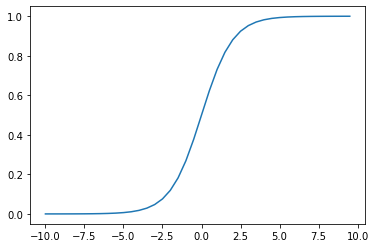

In [12]:
def sigmoid(x):
    sigmoid = 1 / (1 + np.exp(-x))
    #sigmoid = 0.5*(np.arctan(np.pi*x/2)*2/np.pi + 1)                
    #sigmoid = 1/np.sqrt(1+x**2)   
    #sigmoid = erf(sqrt(pi)*x/2)   
    #sigmoid = 0.5 * (np.tanh(x) + 1)              
    #sigmoid = 0.5 * (x/(1+np.abs(x)) + 1)
    return sigmoid  

x = np.arange(-10.0, 10.0, 0.5)
plt.plot(x, sigmoid(x))

### Defining a fitting function for $\bar{q}$

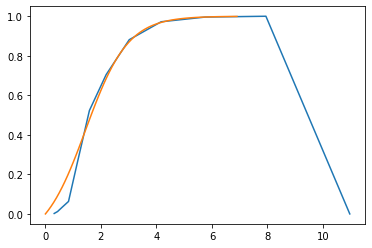

In [13]:
def qmfun(x):
    x0 = 1.45
    alpha = 0.76
    #x0 = 1.8
    #alpha = 1.2
    #beta = 1 / (1 + np.exp(-(-x0)/alpha))
    beta = sigmoid(-x0/alpha)
    qmfun = 1/(1-beta) * (sigmoid((x-x0)/alpha) - beta)
    #x0 = 1.5
    #alpha = 0.8
    #beta = np.arctan(-x0/alpha)
    #qmfun = 1/(np.pi/2-beta) * (np.arctan((x-x0)/alpha) - beta)
    return qmfun   
    
#qm_ntm = np.average(qm[15:23,:], axis=0)
qm_ntm = qm[2,:]
plt.plot(ntm, qm_ntm)

x = np.arange(0.0, 7.0, 0.1)
plt.plot(x, qmfun(x))

### Defining extrapolation for $\bar{q}$

In [14]:
sz0 = 500. #120.0
ntm0 = 8. #4.0
sg_sz = 50.
sg_ntm = 0.5

sg_xt = sg_sz/sz0
sg_yt = sg_ntm/ntm0

zt = np.zeros_like(qm)
for i in range(0, len(sz)):
    for j in range(0, len(ntm)):
        #zt[i,j] = sigmoid(np.sqrt( (sz[i]-sz0)**2/sg_sz**2 + (ntm[j]-ntm0)**2/sg_ntm**2 ))
        #zt[i,j] = sigmoid((sz[i]-sz0)/sg_sz)
        #zt[i,j] = sigmoid((ntm[j]-ntm0)/sg_ntm)
        #zt[i,j] = sigmoid((sz[i]-sz0)/sg_sz) * sigmoid((ntm[j]-ntm0)/sg_ntm)
        xt = sz[i]/sz0
        yt = ntm[j]/ntm0
        rad = np.sqrt(xt**2 + yt**2)
        theta = np.arccos(xt/rad)
        sg_rad = np.cos(theta)**2*sg_xt + np.sin(theta)**2*sg_yt
        zt[i,j] = sigmoid((rad-1)/sg_rad)
        
#print(zt)
#print(sz)
#print(ntm)

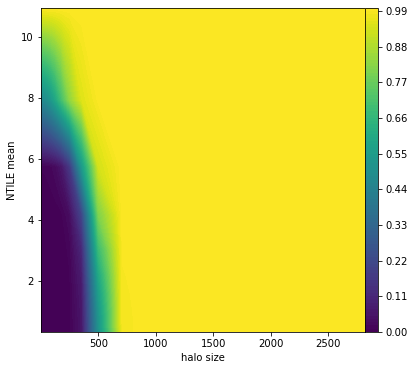

In [15]:
levels_ratio = np.arange(0.0, 1.01, 0.01)
fig = plt.figure(4, figsize=[6,6])

#cs = plt.contourf(sz, ntm, sigmoid(np.sqrt((ntm-x0)**2/sgx**2 + (sz-y0)**2/sgy**2)),
cs = plt.contourf(sz, ntm, zt.T,                
                  levels_ratio,
                  #norm=colors.LogNorm(),
                  #locator=ticker.LogLocator(),
                  #cmap=cm.PuBu_r
                 )

#plt.xlim(range_sz)
#plt.ylim(range_ntm)
plt.xlabel(r"halo size")
plt.ylabel(r"NTILE mean")
#plt.title(label[0])

cbaxes = fig.add_axes([0.88, 0.15, 0.03, 0.75])   
plt.colorbar(cs, cax=cbaxes)

plt.subplots_adjust(left=0.13, right=0.88, bottom=0.15, top=0.9)

In [16]:
print(sz)

[1.00000000e+00 1.41253756e+00 1.99526237e+00 2.81838305e+00
 3.98107192e+00 5.62341364e+00 7.94328300e+00 1.12201856e+01
 1.58489337e+01 2.23872142e+01 3.16227809e+01 4.46683660e+01
 6.30957448e+01 8.91251097e+01 1.25892565e+02 1.77827978e+02
 2.51188698e+02 3.54813472e+02 5.01187357e+02 7.07945969e+02
 1.00000027e+03 1.41253795e+03 1.99526292e+03 2.81838382e+03]


In [17]:
print(np.log10(sz))
print(np.log10(ntm))

[0.         0.15000001 0.30000001 0.45000002 0.60000002 0.75000003
 0.90000004 1.05000004 1.20000005 1.35000005 1.50000006 1.65000007
 1.80000007 1.95000008 2.10000008 2.25000009 2.4000001  2.5500001
 2.70000011 2.85000011 3.00000012 3.15000013 3.30000013 3.45000014]
[-0.5        -0.36       -0.22       -0.08        0.06        0.2
  0.34        0.48        0.62        0.76000001  0.90000001  1.04000001]


### Visualizing different sigmoids
Stand-alone routine (use it to choose among different sigmoids) 

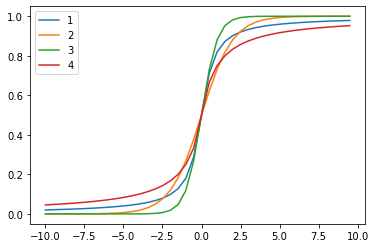

In [18]:
x = np.arange(-10.0, 10.0, 0.5)
plt.plot(x, 0.5*(np.arctan(np.pi*x/2)*2/np.pi + 1), label="1")         
plt.plot(x, 1/(1+np.exp(-x)), label="2")       
#plt.plot(x, 1/np.sqrt(1+x**2))       
#erf(sqrt(pi)*x/2)    
plt.plot(x, 0.5 * (np.tanh(x) + 1), label="3")              
plt.plot(x, 0.5 * (x/(1+np.abs(x)) + 1), label="4")

plt.legend()

### Reading and analysing pair counts 

In [365]:
namin_DD_ref = 'pair count file'
namin_norm_ref = 'pair count normalisation file'

namin_DD_test = 'ref pair count file'
namin_norm_test = 'ref pair normalisation count file'
pltlab = 'some title'

data = ascii.read(namin_DD_ref, format='no_header')
r = np.array(data["col1"])
DD_ref = np.array(data["col3"])

data = ascii.read(namin_norm_ref, format='no_header')
np_ref = np.array(data["col1"])
print(np_ref)

data = ascii.read(namin_DD_test, format='no_header')
r = np.array(data["col1"])
DD_test = np.array(data["col3"])

data = ascii.read(namin_norm_test, format='no_header')
np_test = np.array(data["col1"])
print(np_test)

print(np_test/np_ref)

[6.52669634e+13]
[6.16750887e+13]
[0.94496642]


[1.05823866]
a file named '/Users/davide/qua/emulate_bitw/plt/DD_llen0.03_nsplit3_fnt1_mu1_sg0_NEW2.jpeg' has been written


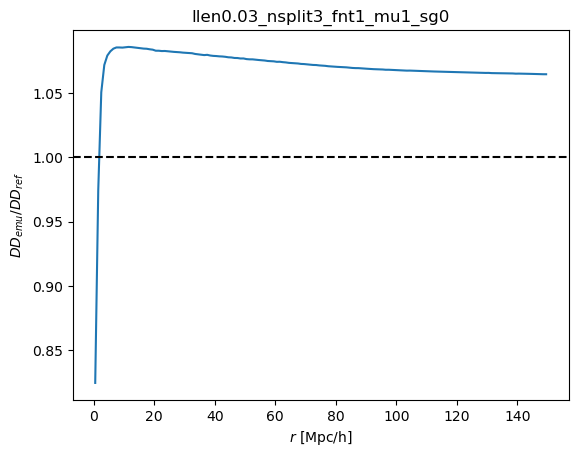

In [366]:
fact = np_ref/np_test
print(fact)

plt.plot(r, DD_test/DD_ref*fact, label="ran0")
plt.axhline(y = 1.0, color = "black", linestyle = "dashed")

#plt.ylim([0.9, 1.1])
plt.xlabel(r"$r$ [Mpc/h]")
plt.ylabel(r"$DD_{emu}/DD_{ref}$")

plt.title(pltlab)